# **Computational Methods**
## **3-D Graphics & 2-D Interpolation**

Written by Niv Keren, nivkeren1@mail.tau.ac.il 

*Computational Methods* class: 0341-2300

2020/Semester I; Tuesdays 14:00-16:00

FACULTY OF EXACT SCIENCES | GEOPHYSICS & PLANETARY SCIENCES  
Tel Aviv University

---
In order to plot continuous lines in the 3D space, we need to `import mplot3d` from the mpl toolkits (part of matplotlib).
The syntax is very similar that of 2D plot.

In [114]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6.67]

Will create a figure and an axes objects.

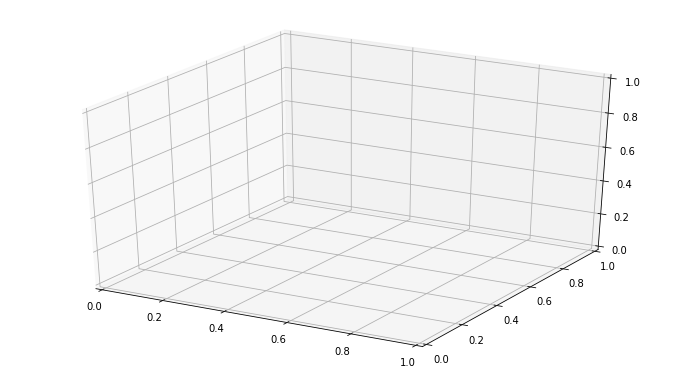

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')

The following lines produce a 3D spiral.

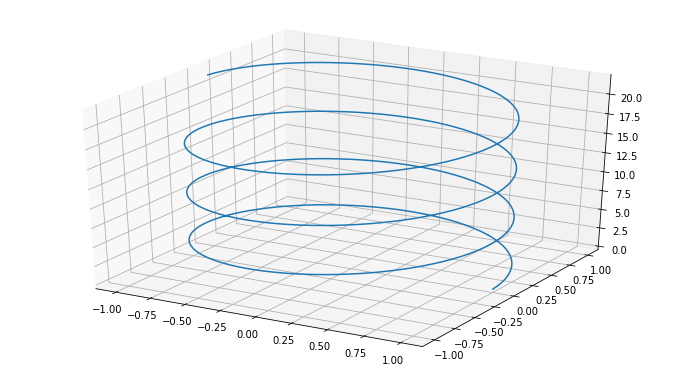

In [27]:
ax = plt.axes(projection='3d')
t = np.linspace(0, 7 * np.pi, 1000)
ax.plot3D(np.cos(t), np.sin(t), t)
plt.show()

As it turns out, a useful tool for 3D graphics is `np.meshgrid` -  
a function that transforms the domain defined by two vectors (x and y) into two arrays (X and Y).  
It simply replicates the vector x as rows and the vector y as columns.

In [121]:
x = np.arange(-2, 3)
y = np.arange(0, 4)
X, Y = np.meshgrid(x, y)

We can now calculate a matrix that will give  
*z = x^2 + y^2*

In [122]:
Z = X**2 + Y**2

`plot_surface` plots z as a function of x and y, as tiles, or rectangles.  
The surfaces are white, opaque, and the mesh lines are coloured according to the value of Z.

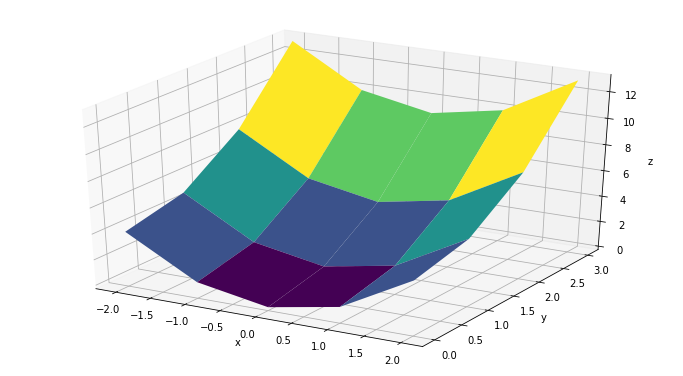

In [123]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()

For demonstartion purposes we will define the function `peaks()` .  
`peaks` is just a function used for example pueposes since it produces 
an example of a visually nice 3d function, for training purposes.

In [137]:
def peaks(X, Y):
    """
    A function for 3D ploting exersice.
    Args:
        X (ndarray): x coordinates of shape (n, n)
        Y (ndarray): y coordinates of shape (n, n)

    Returns:
        ndarray: The z values of the function of shape (n, n)
    """
    return 3 * (1 - X)**2 * np.exp(-(X**2) - (Y+1)**2) \
           - 10 * (X/5 - X**3 - Y**5) * np.exp(-X**2 - Y**2) \
           - 1/3 * np.exp(-(X + 1)**2 - Y**2)

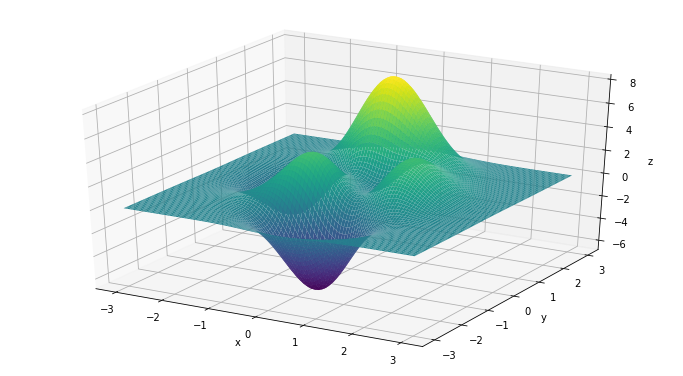

In [157]:
N = 100
ax = plt.axes(projection='3d')
x = np.linspace(-3, 3, N)
y = np.linspace(-3, 3, N)
X, Y = np.meshgrid(x, y)
Z = peaks(X, Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()


The function `contour()` draws a contour plot (topographic map)

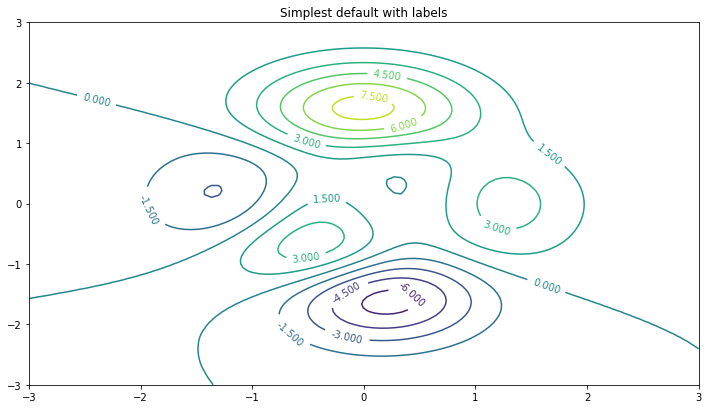

In [158]:
ax = plt.axes()
CS = ax.contour(X, Y, Z, 10)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')
plt.show()

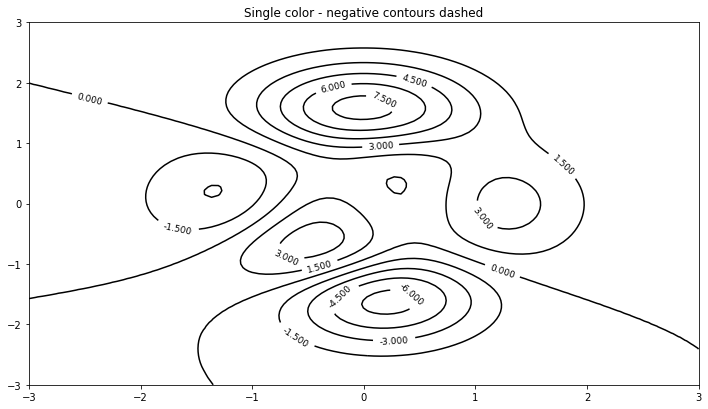

In [159]:
ax = plt.axes()
CS = ax.contour(X, Y, Z, 10, colors='k')  # negative contours will be dashed by default)
ax.clabel(CS, fontsize=9, inline=1)
ax.set_title('Single color - negative contours dashed')
plt.show()

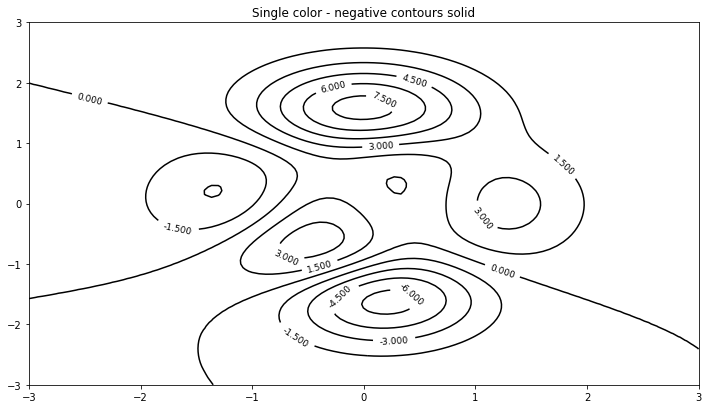

In [160]:
plt.rcParams['contour.negative_linestyle'] = 'solid'
ax = plt.axes()
CS = ax.contour(X, Y, Z, 10, colors='k')  # negative contours will be dashed by default)
ax.clabel(CS, fontsize=9, inline=1)
ax.set_title('Single color - negative contours solid')
plt.show()

We can specify the number of the levels

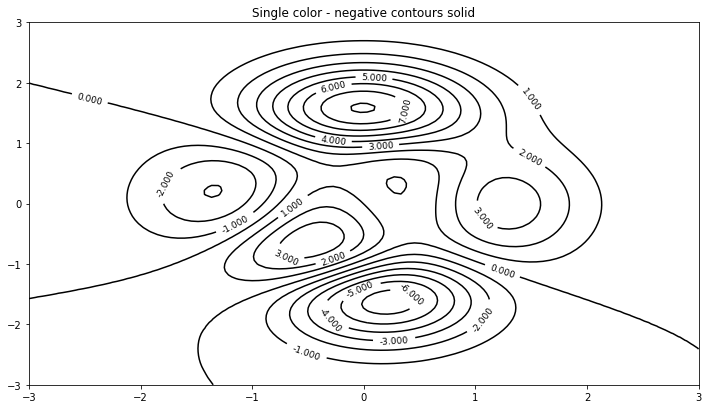

In [166]:
levels = np.arange(-8, 10, 1)
plt.rcParams['contour.negative_linestyle'] = 'solid'
ax = plt.axes()
CS = ax.contour(X, Y, Z, 10, colors='k', levels=levels)
ax.clabel(CS, fontsize=9, inline=1)
ax.set_title('Single color - negative contours solid')
plt.show()

similarly, we can also plot contous in 3D

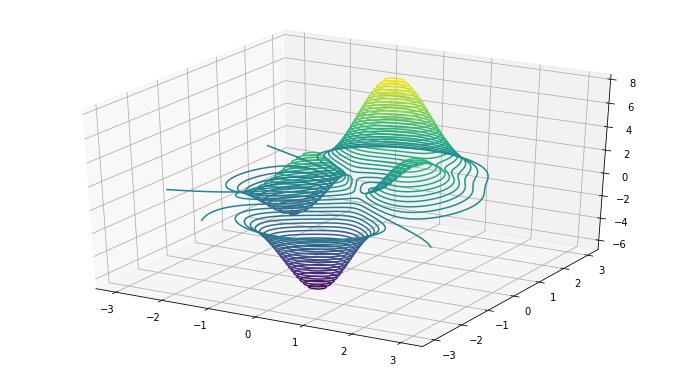

In [167]:
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
plt.show()

---
## **2-D interpolation**

The file *ocean.npy* contains an a two-dimensional array that describes measurements of the ocean depth.

In [ ]:
ocean = np.load("files/ocean.npy)

In [ ]:
mesh (x,y,z)

We can use the interp2 function to interpolate to intermediate
values of x and y.

In [ ]:
doc interp2
zi = interp2(x,y,z,2.2,3.3)

Similar tp 'interp1' we can interpolate in several
methods. Linear interpolation is the default.
spline polynomial interpolation

In [ ]:
zi = interp2(x,y,z,2.2,3.3,'spline')

'nearest neighbor' interpolation

In [ ]:
zi = interp2(x,y,z,2.2,3.3,'nearest')

Let's produce the function in a finer grid
using spline interpolation.

In [ ]:
xi = linspace(0,4,30);
yi = linspace(0,6,40);
[xxi,yyi] = meshgrid(xi,yi);
zzi = interp2(x,y,z,xxi,yyi,'spline');

Let's plot the resulting function 

In [ ]:
mesh(xxi,yyi,zzi)

It's interesting to plot (with red circles)
the original values and see how the interpolation
goes through them

[xx,yy] = meshgrid(x,y);
plot3(xx,yy,z,'or')